<a href="https://colab.research.google.com/github/nedokormysh/GB_DA_algorithms/blob/lesson6/DA_algorithms_hw_6_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров. 

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes

In [10]:
X, y = load_diabetes(return_X_y=True)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [12]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [13]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [14]:
def bias(y, z):
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [ ]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [ ]:
def get_error_plot(n_trees, train_err, test_err, max_depth, eta):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.grid()
    plt.title(f'N trees: {n_trees}, Max depth: {max_depth}, eta = {eta}')
    plt.show()

In [ ]:
def master(alpha=1, number=10, depth=3):
    eta = alpha
    n_trees = number
    max_depth = depth
    coefs = [1] * n_trees  
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth)
    get_error_plot(n_trees, train_errors, test_errors, max_depth, eta)

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тренировочной выборке: 904.5877418557451
Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 1 на тестовой выборке: 3956.904177344667


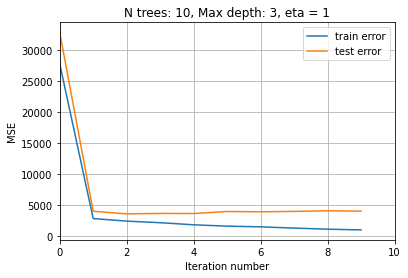

In [ ]:
master(alpha=1, number=10, depth=3)

При заданном шаге 1 и глубине деревьев 3 мы достаточно быстро получаем переобученную на тренировочной выборке модель.

In [ ]:
# master(alpha=1, number=50, depth=3)

Изменим скорость обучения и повторим тесты.

Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 5549.83680951684
Ошибка алгоритма из 10 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 7049.434916259808


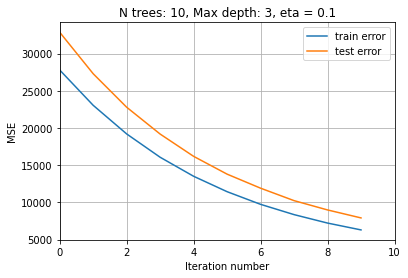

In [ ]:
master(alpha=0.1, number=10, depth=3)

Алгоритмы недообучены. 10 деревьев не хватило.

Ошибка алгоритма из 50 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 1444.0301415192728
Ошибка алгоритма из 50 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 3364.202381111112


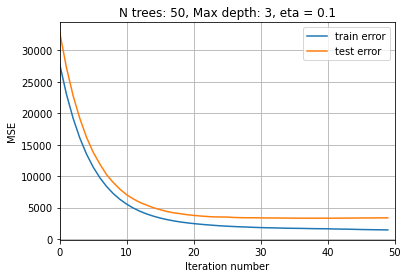

In [ ]:
master(alpha=0.1, number=50, depth=3)

На 20 уже наблюдается переученность модели. Всё таки оптимальным количеством являлось 8-10 деревьев.

Ошибка алгоритма из 50 деревьев глубиной 3 с шагом 0.01 на тренировочной выборке: 11875.648801866806
Ошибка алгоритма из 50 деревьев глубиной 3 с шагом 0.01 на тестовой выборке: 14276.903792550007


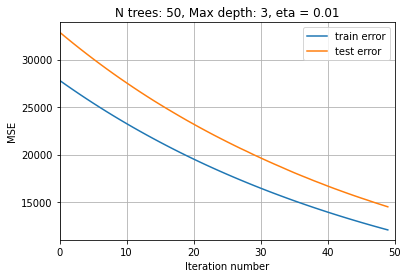

In [ ]:
master(alpha=0.01, number=50, depth=3)

С уменьшенным шагом обучения, модель не обучилась за 50 деревьев.

Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 0.1 на тренировочной выборке: 898.6271660785626
Ошибка алгоритма из 100 деревьев глубиной 3 с шагом 0.1 на тестовой выборке: 3401.585503174457


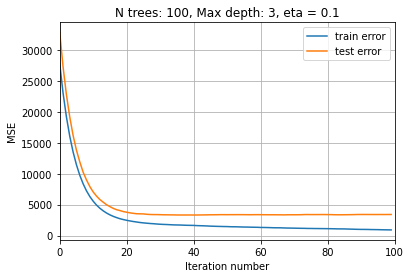

In [ ]:

master(alpha=0.1, number=100, depth=3)

Алгоритм сходится, но за существенное количество времени.

Рассмотрим шаг 0.1 и изменим глубину деревьев.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Ошибка алгоритма из 50 деревьев глубиной 1 с шагом 0.1 на тренировочной выборке: 2618.342913225608
Ошибка алгоритма из 50 деревьев глубиной 1 с шагом 0.1 на тестовой выборке: 3553.7655675563324


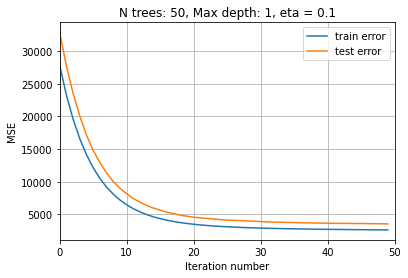

In [ ]:
%time
master(alpha=0.1, number=50, depth=1)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Ошибка алгоритма из 50 деревьев глубиной 7 с шагом 0.1 на тренировочной выборке: 23.06334553523735
Ошибка алгоритма из 50 деревьев глубиной 7 с шагом 0.1 на тестовой выборке: 4259.297796226023


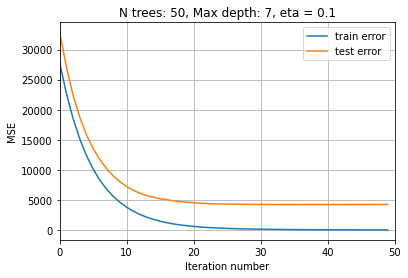

In [ ]:
%time
master(alpha=0.1, number=50, depth=7)

# Задание 2.

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [40]:
def stochastic_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, size=0.5):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []

    idx_num = 0
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:

            idx_num += 1

            # собераем выборку на каждом шаге
            sample_size = int(len(X_train) * size)
            sample_idx = np.random.randint(0, len(X_train), size=sample_size)

            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[sample_idx], bias(y_train[sample_idx], target[sample_idx]))
            # print(f'Index number of {idx_num} iteration = {sample_idx}')
                      
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [43]:
n_trees = 70
coefs = [1] * n_trees
trees, train_errors, test_errors = gb_fit(n_trees, 4, X_train, X_test, y_train, y_test, coefs, eta=0.1)
trees_stochastic, train_errors_stochastic, test_errors_stochastic = stochastic_gb_fit(n_trees, 4, X_train, X_test, y_train, y_test, coefs, eta=0.05, size=0.5)

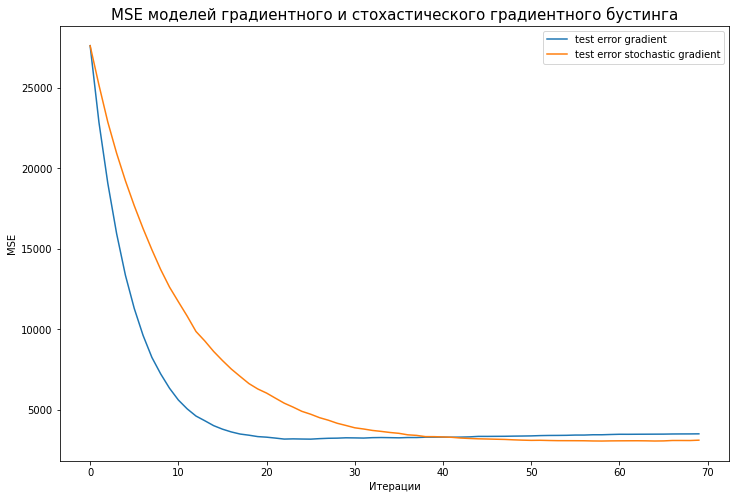

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(list(range(n_trees)), test_errors, label='test error gradient')
plt.plot(list(range(n_trees)), test_errors_stochastic, label='test error stochastic gradient')
plt.title('MSE моделей градиентного и стохастического градиентного бустинга', size=15)
plt.xlabel('Итерации')
plt.ylabel('MSE' )
plt.legend()

Модель стохастического градиентного спуска также сходится, но делает это за большее количество итераций.